### **UNIVERSIDAD TORCUATO DI TELLA - MAESTRÍA EN ECONOMETRÍA**  

#### **ANÁLISIS ESTADÍSTICO MULTIVARIADO** 

**Profesora**: Clemente, Alejandra.  
**Ayudante**: Mendoza Greco, Maximiliano.  
**Alumnos**: Dignani, Franco; Guzzi, David.

**Ciclo lectivo**: Segundo Trimestre 2024.

#### **1. ANÁLISIS EXPLORATORIO**

##### **1.1. ANÁLISIS DESCRIPTIVO DE LAS VARIABLES**

In [175]:
#Importación de librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.decomposition import PCA

import tabulate

#Configuraciones de visualización.
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)


En este estudio se han seleccionado los países miembros de la **Organización para la Cooperación y el Desarrollo Económicos (OCDE)** junto con **Argentina** para analizar diversos indicadores económicos y sociales relacionados, de forma general, con la **Agricultura**. La elección de los países de la OCDE se basa en su diversidad económica y geográfica, así como en su relevancia en políticas internacionales y estándares de desarrollo. Argentina fue incluida como un caso de estudio adicional, proporcionando una perspectiva contrastante respecto a los países desarrollados. Se considera que este enfoque permite **comparar y contrastar una amplia gama de datos y naciones**, al tiempo de identificar patrones y tendencias clave. 
Para el presente análisis, se ha seleccionado el **año 2019** como punto de referencia clave (dado que se considera representa el último año con condiciones económicas y sociales estables antes del impacto global de la pandemia de COVID-19) en conjunto con las **siguientes variables** que se resumen y definen del siguiente modo:

- **Agricultural land (% of land area):** Mide la proporción de tierras agrícolas, que incluye tierras arables, cultivos permanentes y pastos permanentes.
- **Arable land (% of land area):** Mide la proporción de tierra que se utiliza para cultivos temporales, pastos temporales y jardines, excluyendo tierras abandonadas por cultivo itinerante.
- **Agricultural raw materials exports (% of merchandise exports):** Mide proporción de exportaciones de materias primas agrícolas dentro del total de exportaciones de mercancías. 
- **Agricultural raw materials imports (% of merchandise imports):** Mide la proporción de las importaciones de materias primas agrícolas respecto al total de importaciones de mercancías.
- **Agriculture, forestry, and fishing, value added (% of GDP):** Representa el valor agregado neto de los sectores de agricultura, silvicultura y pesca como porcentaje del PIB. Incluye la producción agrícola, ganadera, caza, pesca y silvicultura, y excluye la depreciación de activos y la degradación de recursos naturales.
- **Employment in agriculture (% of total employment) (modeled ILO estimate):** Mide la proporción de personas empleadas en el sector agrícola, que incluye actividades de agricultura, caza, silvicultura y pesca, en comparación con el total de empleo.
- **Rural population (% of total population):** Mide la proporción de personas que viven en áreas rurales como porcentaje de la población.

**Fuente:** [World Bank Group: World Development Indicators.](https://databank.worldbank.org/source/world-development-indicators#)

In [176]:
#Lectura y visualización de matriz de datos
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\TP AEM - database.xlsx"
df = pd.read_excel(path)
df

,Country Name,Country Code,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
0,Argentina,ARG,42.5908,14.9117,0.8813,1.0457,5.3186,7.3309,8.0090
1,Australia,AUS,47.1238,3.9746,2.1059,0.6622,2.1131,2.5583,13.8760
2,Austria,AUT,32.1281,16.0631,1.5208,1.8149,1.0524,3.6561,41.4850
3,Belgium,BEL,44.7960,28.3120,1.2331,1.0485,0.6700,0.9196,1.9590
4,Canada,CAN,6.4344,4.3107,3.6934,0.8181,1.6971,1.5105,18.5180
5,Switzerland,CHE,38.1050,10.0936,0.1410,0.5495,0.6477,2.5380,26.1510
6,Chile,CHL,15.2390,1.7577,6.9273,0.7305,3.9878,9.0692,12.3570
7,Colombia,COL,39.9766,1.9040,4.0533,0.8649,6.4107,16.1112,18.8960
8,Costa Rica,CRI,34.7826,4.7591,1.8074,1.0280,4.2021,15.3081,19.9240
9,Czechia,CZE,45.6400,32.1800,1.3095,1.0655,1.8608,2.6638,26.0790


In [177]:
df.columns = df.columns.str.replace(r"\s*\(.*\)", "", regex=True) #Se elimina información entre paréntesis.
ndf = df.iloc[:,1:].set_index('Country Code') #ndf: numereric pandas DataFrame.
ndf.info() #Breve información de la matriz de datos (cantidad de observaciones, tipo de formatos, etc.)

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, ARG to USA
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Agricultural land                                39 non-null     float64
 1   Arable land                                      39 non-null     float64
 2   Agricultural raw materials exports               39 non-null     float64
 3   Agricultural raw materials imports               39 non-null     float64
 4   Agriculture, forestry, and fishing, value added  39 non-null     float64
 5   Employment in agriculture                        39 non-null     float64
 6   Rural population                                 39 non-null     float64
dtypes: float64(7)
memory usage: 2.4+ KB


In [178]:
#Función a utilizar para la obtención de estadísticas descriptivas a partir de una matriz de datos.
def estadisticas_descriptivas(X: pd.DataFrame):
    """
    Cálculo de estadísticas descriptivas de una matriz de datos tipo DataFrame.

    Parámetro:
    df (pd.DataFrame): pandas DataFrame con los datos a analizar.

    Devuelve:
    pd.DataFrame: pandas DataFrame con las estadísticas descriptivas extendidas.
    """
    
    desc = X.describe()
    
    #Agrega coeficiente de variación (cv).
    cv = pd.DataFrame(X.std() / X.mean()).T
    cv.index = ['cv']    
    #Agrega curtosis (kurt).
    kurt = pd.DataFrame(X.kurt()).T
    kurt.index = ['kurt']    
    #Agrega asimetría (skew).
    skew = pd.DataFrame(X.skew()).T
    skew.index = ['skew']
    
    desc = pd.concat([desc, cv, kurt, skew], axis=0).reset_index()
    desc = desc.rename(columns={'index': 'Medida'})
    
    return desc
#Estadísticas descriptivas (para todos los países). Obs: Siempre se considerarán medidas muestrales. 
estadisticas_descriptivas(ndf)

,Medida,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,count,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000
1,mean,38.3466,18.2686,2.4064,1.3690,2.4099,5.0710,21.2514
2,std,17.3003,13.6352,2.8458,0.6346,1.6200,4.3974,11.2517
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.9538,6.9086,0.7088,0.9026,1.3024,2.1510,12.8710
5,50%,43.1253,16.1404,1.3095,1.1496,1.9073,3.7783,19.2910
6,75%,48.3528,26.7491,2.6729,1.7546,3.3223,6.1308,28.8100
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4512,0.7464,1.1826,0.4635,0.6722,0.8672,0.5295
9,kurt,-0.3435,0.8862,4.3522,0.1051,0.4283,1.9449,-0.3566


In [179]:
#Estadísticas descriptivas (sin incluir Argentina).
ndf_oecd = ndf.drop('ARG')
desc_oecd = estadisticas_descriptivas(ndf_oecd)

#Para Argentina.
ndf_arg = ndf.loc[['ARG']].reset_index()

display(desc_oecd, ndf_arg)

,Medida,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,count,38.0000,38.0000,38.0000,38.0000,38.0000,38.0000,38.0000
1,mean,38.2349,18.3569,2.4465,1.3775,2.3334,5.0116,21.5999
2,std,17.5183,13.8070,2.8728,0.6408,1.5686,4.4405,11.1874
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.7273,6.6695,0.6938,0.8884,1.2844,2.1149,13.5078
5,50%,43.7443,16.3399,1.3380,1.1531,1.8841,3.7172,19.3630
6,75%,48.6791,27.4033,2.7402,1.7839,3.2592,5.7397,29.0370
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4582,0.7521,1.1742,0.4652,0.6723,0.8860,0.5179
9,kurt,-0.4182,0.7749,4.1573,0.0087,0.9200,1.9896,-0.3474


,Country Code,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,ARG,42.5908,14.9117,0.8813,1.0457,5.3186,7.3309,8.0090


La **matriz de datos** presenta **38 observaciones** pertenecientes a países de la **OCDE** y, sumando a **Argentina**, da **39 en total**. Si bien el **análisis considerará el conjunto de 39 observaciones**, aquí se dividen ambos grupos para **enriquecer la descripción** de cada una de las variables, que se pasa a comentar de forma general brevemente.

- En la gran mayoría de las variables se observa una **disparidad** importarte entre los **valores mínimos y máximos**. Esto nos da cuenta de la **heterogeneidad de economías** presentes en matriz de datos;
- A pesar de ello, considerando la **matriz de forma agrupada** puede observarse que esta heterogeneidad parecería desaparecer dado que los guarismos para los **promedios** y las **medianas** no son muy disímiles, lo que indicaría que los **casos extremos** dentro de la matriz no serían significativos. Por otro lado, no obstante, algunas variables presentan altos **desvíos estándar**, como el caso de *Agricultural land, Arable land, y Rural population*.
- Con relación a la **distribución de las variables**, la gran mayoría presentan distribuciones positivas sesgadas hacia la derecha al tiempo de evidenciar colas de distrbicuón alargadas (dados los valores extremos presentes).


##### **1.2. CÁLCULO DE MATRIZ DE VARIANZAS Y COVARIANZAS Y MATRIZ DE CORRELACIONES**

In [180]:
#Cálculo de matriz de varianzas y covarianzas (incluye todos los registros).
mcov = ndf.cov()
mcov

,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
Agricultural land,299.2999,143.1640,-15.1587,-0.2389,-1.6690,5.1291,28.7369
Arable land,143.1640,185.9197,-9.1130,3.2334,-5.5738,-11.6462,21.6284
Agricultural raw materials exports,-15.1587,-9.1130,8.0986,0.5600,1.6387,1.1587,-1.0304
Agricultural raw materials imports,-0.2389,3.2334,0.5600,0.4027,0.0430,0.1770,2.0701
"Agriculture, forestry, and fishing, value added",-1.6690,-5.5738,1.6387,0.0430,2.6243,5.7188,-0.8835
Employment in agriculture,5.1291,-11.6462,1.1587,0.1770,5.7188,19.3369,7.1725
Rural population,28.7369,21.6284,-1.0304,2.0701,-0.8835,7.1725,126.6001


**Comentarios:**
- Se observa **variancia máxima** en *Agricultural land* y **varianza mínima** en *Agricultural imports*.
- Predominan **relaciones positivas** entre las variables, siendo la más significativa entre *Agricultural land y Arable land*. Por su parte, la **relación negativa** más significativa se produce entre *Agricultural land y Agricultural exports* (contraintuitivo, en principio).
- El análisis de la **matriz de correlación**, que presenta guarismos no influidos por las unidades de medida de las distintas variables, permitirá confirmar los anteriores comentarios.


In [181]:
#Cálculo de matriz de correlaciones (incluye todos los registros).
mcor = ndf.corr()
mcor

,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
Agricultural land,1.0000,0.6069,-0.3079,-0.0218,-0.0596,0.0674,0.1476
Arable land,0.6069,1.0000,-0.2349,0.3737,-0.2523,-0.1942,0.1410
Agricultural raw materials exports,-0.3079,-0.2349,1.0000,0.3101,0.3555,0.0926,-0.0322
Agricultural raw materials imports,-0.0218,0.3737,0.3101,1.0000,0.0419,0.0634,0.2899
"Agriculture, forestry, and fishing, value added",-0.0596,-0.2523,0.3555,0.0419,1.0000,0.8028,-0.0485
Employment in agriculture,0.0674,-0.1942,0.0926,0.0634,0.8028,1.0000,0.1450
Rural population,0.1476,0.1410,-0.0322,0.2899,-0.0485,0.1450,1.0000


**Comentarios:**
- Las variables, al ser estandarizadas, confirmarían los **grados y direcciones** de relación comentados anteriormente. Incluso, los guarismos de relación serían más altos en términos absolutos.


In [182]:
#Medidas de variabilidad conjunta y medidas de correlación conjunta.
varianza_total = np.trace(mcov)
varianza_media = varianza_total / len(ndf.columns)
varianza_generalizada = np.linalg.det(mcov)
varianza_efectiva = varianza_generalizada**(1/len(ndf.columns))

dependencia_conjunta = np.linalg.det(mcor)
dependencia_efectiva = dependencia_conjunta**(1/(len(ndf.columns)-1))

medidas_globales = pd.DataFrame([[varianza_total, varianza_media, varianza_generalizada, varianza_efectiva, dependencia_conjunta, dependencia_efectiva]],
                                columns=['varianza_total', 'varianza_media', 'varianza_generalizada', 'varianza_efectiva', 'dependencia_conjunta', 'dependencia_efectiva'])
medidas_globales

,varianza_total,varianza_media,varianza_generalizada,varianza_efectiva,dependencia_conjunta,dependencia_efectiva
0,642.2821,91.7546,77537504.1862,13.3990,0.0665,0.6365


**Comentarios:**
- Dado el rango que pueden tomar los valores (0 a 1), las medidas de variabilidad global indicarían un **bajo nivel de varianza global** (considerando o no los valores no presentes en la diagonal principal).
- Las medidas de dependencia global indicarían un bajo nivel de dependencia conjunta. Sin embargo, esto puede explicarse no porque las varíales estén estrictamente correlacionadas sino más bien a que las mismas están expresadas en relación a otra medida de comparación común (como el PBI, por ejemplo).


#### **2. ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)**

##### **2.1. PCA - MATRIZ DE VARIANZA Y COVARIANZAS**

##### **2.1.1. VARIANZA (eigenvalues)**

In [183]:
pca_cov = PCA()
componentes_cov = pca_cov.fit_transform(ndf)

varianza_cov = pca_cov.explained_variance_
varianza_explicada_cov = pca_cov.explained_variance_ratio_
varianza_explicada_acum_cov = np.cumsum(pca_cov.explained_variance_ratio_)
coeficientes_cov =  pca_cov.components_.T

#Generamos una tabla resumen.
data_var_cov = {
    'Varianza (eigenvalues)': varianza_cov,
    'Varianza Explicada': varianza_explicada_cov,
    'Varianza Explicada Acumulada': varianza_explicada_acum_cov
}

variablespca_cov = pd.DataFrame(data_var_cov, index=[f'Componente {i+1}' for i in range(len(varianza_cov))]).reset_index(names='N° de Componente')
variablespca_cov

,N° de Componente,Varianza (eigenvalues),Varianza Explicada,Varianza Explicada Acumulada
0,Componente 1,402.1466,0.6261,0.6261
1,Componente 2,122.5019,0.1907,0.8169
2,Componente 3,91.1414,0.1419,0.9588
3,Componente 4,18.4013,0.0286,0.9874
4,Componente 5,7.2756,0.0113,0.9987
5,Componente 6,0.6005,0.0009,0.9997
6,Componente 7,0.2148,0.0003,1.0000


##### **2.1.2. COEFICIENTES (eigenvectors)**

In [184]:
coeficientespca_cov = pd.DataFrame(coeficientes_cov, columns=[f'Coeficiente (eigenvector) {i+1}' for i in range(coeficientes_cov.shape[1])], index=ndf.columns).reset_index(names='Variable')
coeficientespca_cov


,Variable,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land,0.8187,-0.1213,-0.5521,-0.0820,0.0568,-0.0018,0.0134
1,Arable land,0.5575,-0.0498,0.8125,0.1600,-0.0063,0.0045,-0.0311
2,Agricultural raw materials exports,-0.0448,0.0119,0.0085,0.1400,0.9733,-0.1460,-0.0976
3,Agricultural raw materials imports,0.0046,0.0158,0.0297,0.0361,0.0723,-0.1409,0.9861
4,"Agriculture, forestry, and fishing, value added",-0.0117,0.0002,-0.0518,0.3047,0.1084,0.9376,0.1164
5,Employment in agriculture,-0.0039,0.0685,-0.1766,0.9216,-0.1799,-0.2815,-0.0565
6,Rural population,0.1293,0.9888,-0.0152,-0.0682,0.0062,0.0234,-0.0106


##### **2.1.3. COMPONENTES PRINCIPALES**

In [185]:
componentespca_cov = pd.DataFrame(componentes_cov, columns=[f'Componente {i+1} ' for i in range(componentes_cov.shape[1])], index=df.iloc[:,0]).reset_index()
componentespca_cov

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,-0.0846,-13.3099,-5.4421,2.7610,-1.4191,2.0268,0.3427
1,Australia,-1.7125,-7.8332,-15.9116,-4.9780,0.6197,0.3196,0.0796
2,Austria,-3.6418,20.7706,1.6602,-3.0475,-0.9359,-0.3337,0.2181
3,Belgium,8.4727,-20.6625,5.6962,-2.1385,-0.4236,-0.6640,-0.1900
4,Canada,-34.3002,1.6272,6.9804,-2.7682,0.0333,0.1560,-0.5140
5,Switzerland,-3.9936,5.0672,-6.0878,-4.8403,-1.9310,-0.4149,-0.4505
6,Chile,-29.5127,-4.8508,-1.2903,4.6346,2.5412,-0.4551,-0.8141
7,Colombia,-8.2587,-0.9436,-16.3184,9.0139,0.1951,0.3427,-0.2610
8,Costa Rica,-10.6563,0.4815,-10.9047,8.1051,-2.3809,-1.1507,-0.2619
9,Czechia,14.4143,3.0130,7.6379,-1.2515,-0.3592,0.5274,-0.5062


##### **2.1.4. VARIANZA EXPLICADA EN TÉRMINOS GRÁFICOS**

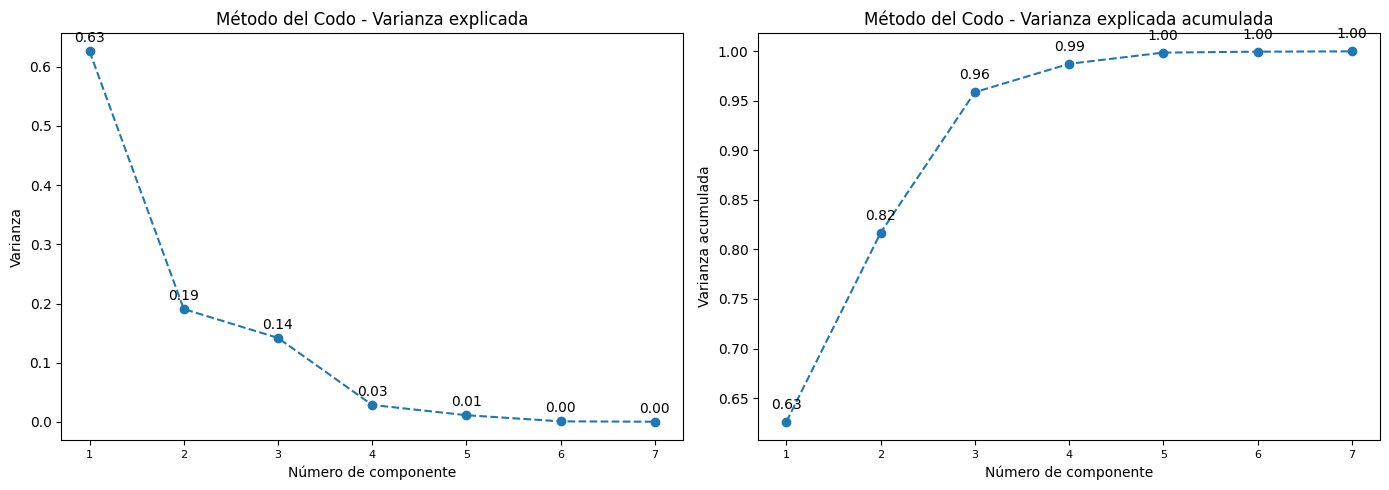

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Primer gráfico: Varianza explicada.
ax[0].plot(range(1, len(varianza_explicada_cov) + 1), varianza_explicada_cov, marker='o', linestyle='--')
ax[0].set_xlabel('Número de componente')
ax[0].set_ylabel('Varianza')
ax[0].set_title('Método del Codo - Varianza explicada')
for i, v in enumerate(varianza_explicada_cov):
    ax[0].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Segundo gráfico: Varianza explicada acumulada.
ax[1].plot(range(1, len(varianza_explicada_acum_cov) + 1), varianza_explicada_acum_cov, marker='o', linestyle='--')
ax[1].set_xlabel('Número de componente')
ax[1].set_ylabel('Varianza acumulada')
ax[1].set_title('Método del Codo - Varianza explicada acumulada')
for i, v in enumerate(varianza_explicada_acum_cov):
    ax[1].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### **2.2. PCA - MATRIZ DE CORRELACIÓN**

##### **2.2.1. VARIANZA (eigenvalues)**

In [187]:
ndf_media = ndf.mean()
ndf_de = ndf.std()
ndf_scaled = ((ndf - ndf_media) / ndf_de)

pca_cor = PCA()
componentes_cor = pca_cor.fit_transform(ndf_scaled)

varianza_cor = pca_cor.explained_variance_
varianza_explicada_cor = pca_cor.explained_variance_ratio_
varianza_explicada_acum_cor = np.cumsum(pca_cor.explained_variance_ratio_)
coeficientes_cor =  pca_cor.components_.T

#Generamos una tabla resumen
data_var_cor = {
    'Varianza (eigenvalues)': varianza_cor,
    'Varianza Explicada': varianza_explicada_cor,
    'Varianza Explicada Acumulada': varianza_explicada_acum_cor
}

variablespca_cor = pd.DataFrame(data_var_cor, index=[f'Componente {i+1}' for i in range(len(varianza_cor))]).reset_index(names='N° de Componente')
variablespca_cor

,N° de Componente,Varianza (eigenvalues),Varianza Explicada,Varianza Explicada Acumulada
0,Componente 1,2.1735,0.3105,0.3105
1,Componente 2,1.7162,0.2452,0.5557
2,Componente 3,1.3338,0.1905,0.7462
3,Componente 4,0.8960,0.1280,0.8742
4,Componente 5,0.5298,0.0757,0.9499
5,Componente 6,0.2262,0.0323,0.9822
6,Componente 7,0.1245,0.0178,1.0000


##### **2.2.2. COEFICIENTES (eigenvectors)**

In [188]:
coeficientespca_cor = pd.DataFrame(coeficientes_cor, columns=[f'Coeficiente (eigenvector) {i+1}' for i in range(coeficientes_cor.shape[1])], index=ndf.columns).reset_index(names='Variable')
coeficientespca_cor

,Variable,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land,-0.3549,0.4082,-0.4055,-0.2242,0.4675,-0.5048,-0.1388
1,Arable land,-0.4678,0.4219,0.0334,-0.3519,-0.0973,0.6512,0.2114
2,Agricultural raw materials exports,0.3852,0.0762,0.5127,-0.3129,0.6452,0.0444,0.2585
3,Agricultural raw materials imports,-0.0173,0.4622,0.5868,-0.1190,-0.4701,-0.4205,-0.1727
4,"Agriculture, forestry, and fishing, value added",0.5456,0.3133,-0.2479,-0.1807,-0.0170,0.3103,-0.6431
5,Employment in agriculture,0.4495,0.4094,-0.3699,0.0904,-0.2299,-0.1188,0.6468
6,Rural population,-0.0827,0.4125,0.1703,0.8204,0.2855,0.1787,-0.0866


##### **2.2.3. COMPONENTES PRINCIPALES**

In [189]:
componentespca_cor = pd.DataFrame(componentes_cor, columns=[f'Componente {i+1} ' for i in range(componentes_cor.shape[1])], index=df.iloc[:,0]).reset_index()
componentespca_cor

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,1.1384,0.0073,-1.5171,-0.9835,-0.4523,0.1920,-0.8570
1,Australia,-0.0137,-1.3198,-0.8034,-0.1355,0.7420,-0.5812,-0.3220
2,Austria,-0.6793,0.4337,1.0262,1.7488,-0.0818,-0.1336,-0.0111
3,Belgium,-1.4955,-1.2323,-0.3109,-1.4516,-0.1802,-0.0420,0.3132
4,Canada,0.7388,-2.1212,0.8035,0.5427,0.0614,0.5658,0.0869
5,Switzerland,-0.8873,-1.3132,-0.6233,1.1186,0.4205,-0.0670,0.1816
6,Chile,2.6753,-1.0488,0.0127,-0.3939,0.5401,0.4322,0.5441
7,Colombia,3.2579,0.9243,-1.8244,-0.0762,0.2287,-0.0387,0.0737
8,Costa Rica,2.1246,0.4846,-1.5284,0.4385,-0.4708,-0.2790,0.6620
9,Czechia,-1.2336,0.1987,-0.2554,0.0877,0.3280,0.6721,-0.0332


##### **2.2.4. VARIANZA EXPLICADA EN TÉRMINOS GRÁFICOS**

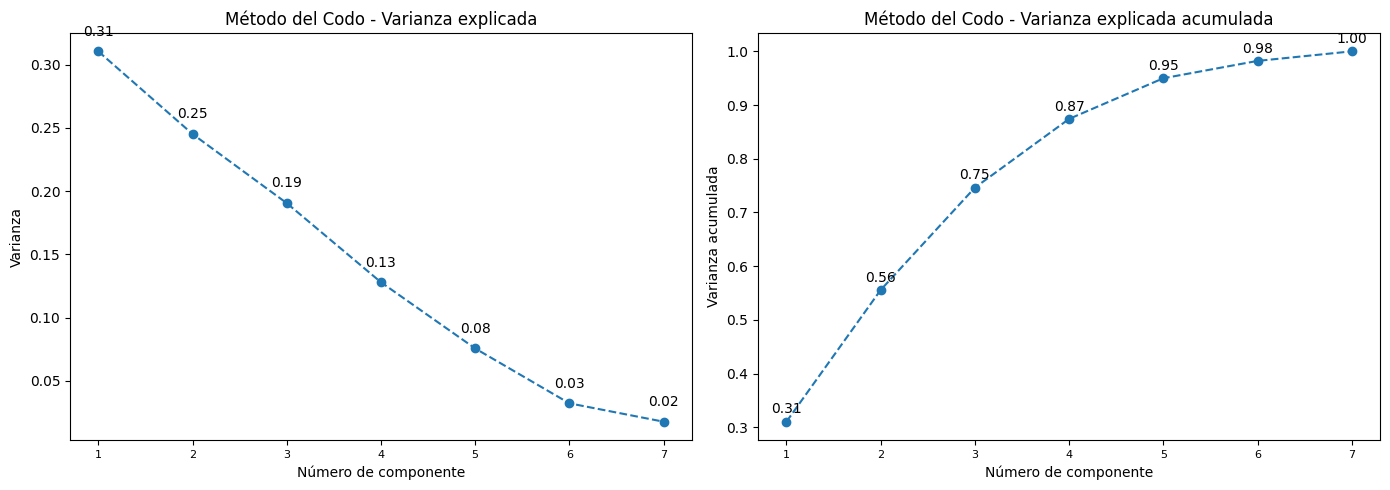

In [190]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Primer gráfico: Varianza explicada.
ax[0].plot(range(1, len(varianza_explicada_cor) + 1), varianza_explicada_cor, marker='o', linestyle='--')
ax[0].set_xlabel('Número de componente')
ax[0].set_ylabel('Varianza')
ax[0].set_title('Método del Codo - Varianza explicada')
for i, v in enumerate(varianza_explicada_cor):
    ax[0].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Segundo gráfico: Varianza explicada acumulada.
ax[1].plot(range(1, len(varianza_explicada_acum_cor) + 1), varianza_explicada_acum_cor, marker='o', linestyle='--')
ax[1].set_xlabel('Número de componente')
ax[1].set_ylabel('Varianza acumulada')
ax[1].set_title('Método del Codo - Varianza explicada acumulada')
for i, v in enumerate(varianza_explicada_acum_cor):
    ax[1].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### **2.3. VARIANZA EXPLICADA EN TÉRMINOS GRÁFICOS EN FORMA COMPARATIVA**

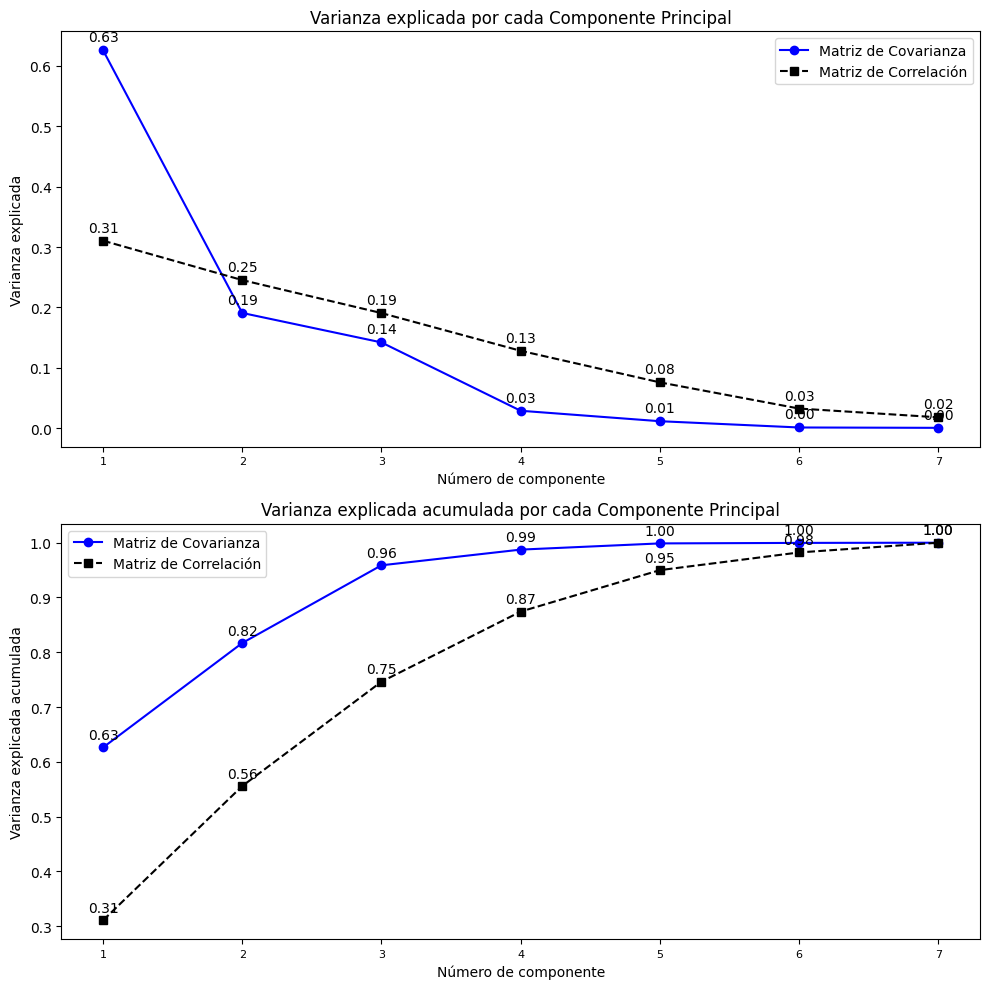

In [191]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Primer gráfico: Varianza explicada (dos líneas: cov y cor).
ax[0].plot(range(1, len(varianza_explicada_cov) + 1), varianza_explicada_cov, marker='o', linestyle='-', color='blue', label='Matriz de Covarianza')
ax[0].plot(range(1, len(varianza_explicada_cor) + 1), varianza_explicada_cor, marker='s', linestyle='--', color='black', label='Matriz de Correlación')
ax[0].set_xlabel('Número de componente')
ax[0].set_ylabel('Varianza explicada')
ax[0].set_title('Varianza explicada por cada Componente Principal')
ax[0].legend()
for i, v in enumerate(varianza_explicada_cov):
    ax[0].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
for i, v in enumerate(varianza_explicada_cor):
    ax[0].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Segundo gráfico: Varianza explicada acumulada (dos líneas: cov y cor).
ax[1].plot(range(1, len(varianza_explicada_acum_cov) + 1), varianza_explicada_acum_cov, marker='o', linestyle='-', color='blue', label='Matriz de Covarianza')
ax[1].plot(range(1, len(varianza_explicada_acum_cor) + 1), varianza_explicada_acum_cor, marker='s', linestyle='--', color='black', label='Matriz de Correlación')
ax[1].set_xlabel('Número de componente')
ax[1].set_ylabel('Varianza explicada acumulada')
ax[1].set_title('Varianza explicada acumulada por cada Componente Principal')
ax[1].legend()
for i, v in enumerate(varianza_explicada_acum_cov):
    ax[1].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
for i, v in enumerate(varianza_explicada_acum_cor):
    ax[1].text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### **2.4. INTERPRETACIÓN DE LAS DOS PRIMERAS COMPONENTES**

In [192]:
#Selección de componentes
componentes = componentespca_cor.iloc[:,0:3]
componentes

,Country Name,Componente 1,Componente 2
0,Argentina,1.1384,0.0073
1,Australia,-0.0137,-1.3198
2,Austria,-0.6793,0.4337
3,Belgium,-1.4955,-1.2323
4,Canada,0.7388,-2.1212
5,Switzerland,-0.8873,-1.3132
6,Chile,2.6753,-1.0488
7,Colombia,3.2579,0.9243
8,Costa Rica,2.1246,0.4846
9,Czechia,-1.2336,0.1987


In [193]:
ncomponentes = componentes.iloc[:,1:]
desc_pca = estadisticas_descriptivas(ncomponentes)
desc_pca = desc_pca[desc_pca['Medida'] != 'cv'] #No se contempla cv.
desc_pca

,Medida,Componente 1,Componente 2
0,count,39.0000,39.0000
1,mean,0.0000,0.0000
2,std,1.4743,1.3100
3,min,-2.6090,-2.1212
4,25%,-1.1236,-1.0336
5,50%,-0.0392,0.0073
6,75%,0.9386,0.6697
7,max,3.2579,3.4038
9,kurt,-0.4980,-0.0901
10,skew,0.4785,0.3901


In [194]:
#Correlación entre primeros 2 componentes y variables de matriz de datos.
cor_pca_variables = pd.concat([df.iloc[:, 2:], componentes.iloc[:,1:]], axis=1).corr().iloc[:-2, -2:].reset_index(names='Variable')
cor_pca_variables

,Variable,Componente 1,Componente 2
0,Agricultural land,-0.5233,0.5347
1,Arable land,-0.6897,0.5526
2,Agricultural raw materials exports,0.5678,0.0998
3,Agricultural raw materials imports,-0.0255,0.6056
4,"Agriculture, forestry, and fishing, value added",0.8043,0.4104
5,Employment in agriculture,0.6627,0.5364
6,Rural population,-0.1219,0.5404


In [195]:
#Se aprecia, como es de esperar, que las correlaciones sean las mismas ante la matriz de datos no estandariza (arriba) o estandarizada (aquí).
pd.concat([ndf_scaled.reset_index().iloc[:, 1:], componentes.iloc[:,1:]], axis=1).corr().iloc[:-2, -2:].reset_index(names='Variable')

,Variable,Componente 1,Componente 2
0,Agricultural land,-0.5233,0.5347
1,Arable land,-0.6897,0.5526
2,Agricultural raw materials exports,0.5678,0.0998
3,Agricultural raw materials imports,-0.0255,0.6056
4,"Agriculture, forestry, and fishing, value added",0.8043,0.4104
5,Employment in agriculture,0.6627,0.5364
6,Rural population,-0.1219,0.5404


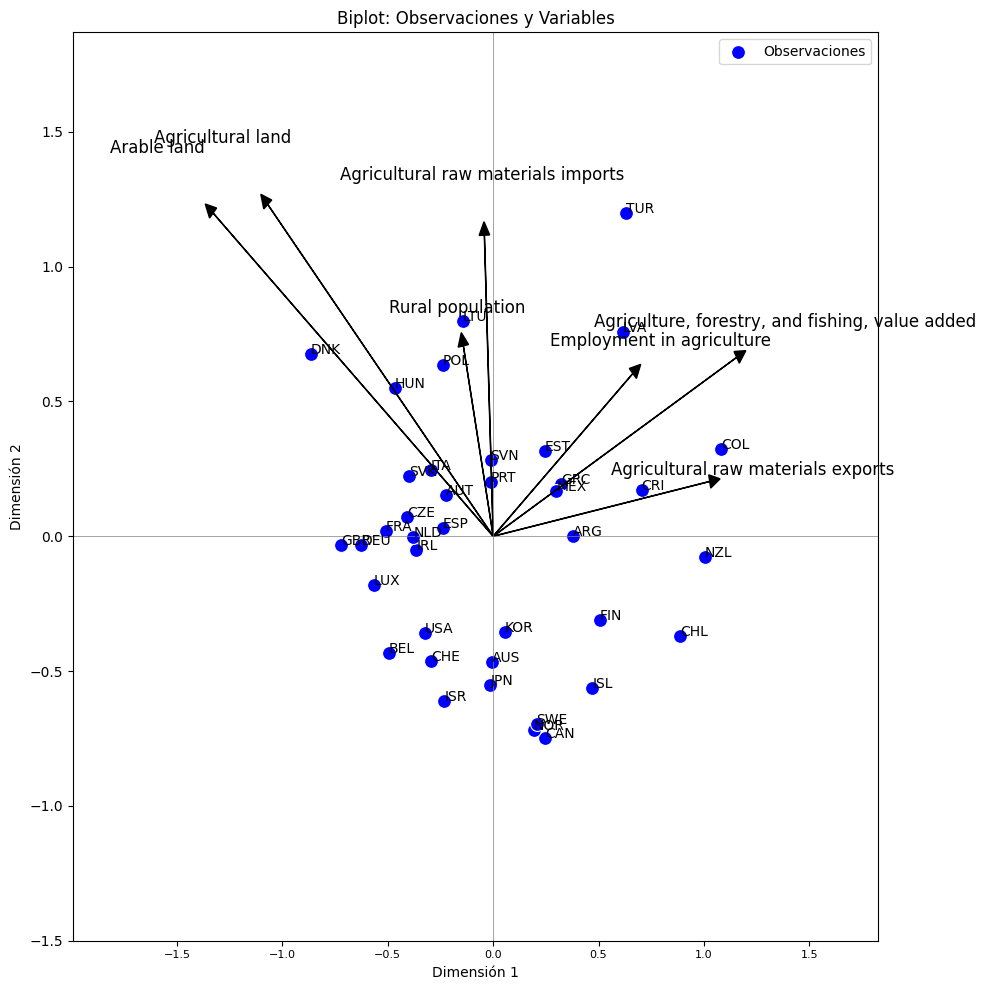

In [196]:
#Datos para gráfico Biplot. Se trbajará con c = 0.5.

ndf_scaled_producto = np.dot(np.transpose(ndf_scaled), ndf_scaled)
autovalores, autovectores = np.linalg.eig(ndf_scaled_producto)

D = pd.DataFrame(np.diag(autovalores))
D_raiz_neg = pd.DataFrame(np.where(D != 0, np.power(D, -1/2),0))
D_cuarta = pd.DataFrame(np.where(D != 0, np.power(D, 1/4),0))

componentes_biplot = np.dot(componentespca_cor.iloc[:,1:], D_raiz_neg)
componentes_biplot = pd.DataFrame(np.dot(componentes_biplot, D_cuarta))

coeficientes_biplot = pd.DataFrame(np.dot(D_cuarta, coeficientespca_cor.iloc[:,1:]))
ndf_x = ndf.copy()
ndf_x.columns = [f"x{i}" for i in range(len(ndf_x.columns))]

#Gráfico Biplot.

fig, ax = plt.subplots(figsize=(10, 10))

# Primer gráfico: scatterplot de las componentes principales (Observaciones).
sns.scatterplot(x=componentes_biplot.iloc[:, 0], y=componentes_biplot.iloc[:, 1], ax=ax, s=100, color='blue', label='Observaciones')
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_title('Biplot: Observaciones y Variables')

for i, txt in enumerate(df.iloc[:, 1]):
    ax.annotate(txt, (componentes_biplot.iloc[i, 0], componentes_biplot.iloc[i, 1]))

# Segundo gráfico: vectores de los coeficientes (Variables).
for i in range(coeficientes_biplot.shape[0]):
    ax.arrow(0, 0, coeficientes_biplot.iloc[i, 0], coeficientes_biplot.iloc[i, 1],
             color='black', head_width=0.05, head_length=0.05)
    ax.text(coeficientes_biplot.iloc[i, 0]*1.2, coeficientes_biplot.iloc[i, 1]*1.2,
            ndf.columns[i], color='black', ha='center', va='center', fontsize=12)

# Ajustar los límites de los ejes
xlim_min = min(ax.get_xlim()[0], -1) - 0.5
xlim_max = max(ax.get_xlim()[1], 1) + 0.5
ylim_min = min(ax.get_ylim()[0], -1) - 0.5
ylim_max = max(ax.get_ylim()[1], 1) + 0.5
ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)

# Mostrar el gráfico
plt.tight_layout()
plt.legend()
plt.show()


In [197]:
coeficientes_biplot

,0,1,2,3,4,5,6
0,-1.0700,1.2305,-1.2226,-0.6760,1.4095,-1.5217,-0.4186
1,-1.3294,1.1988,0.0950,-1.0000,-0.2765,1.8506,0.6007
2,1.0277,0.2033,1.3679,-0.8348,1.7216,0.1185,0.6898
3,-0.0417,1.1166,1.4174,-0.2875,-1.1355,-1.0157,-0.4171
4,1.1557,0.6636,-0.5251,-0.3827,-0.0360,0.6572,-1.3622
5,0.6629,0.6038,-0.5456,0.1333,-0.3390,-0.1752,0.9539
6,-0.1416,0.7063,0.2916,1.4047,0.4889,0.3060,-0.1483


#### **3. ANÁLISIS DE CLUSTERS JERÁRQUICO**

##### **3.1. SELECCIÓN DE MÉTODO DE CLUSTER**

In [198]:
from sklearn.metrics import pairwise_distances

matriz_distancia = pairwise_distances(componentes.iloc[:,1:], metric='euclidean')

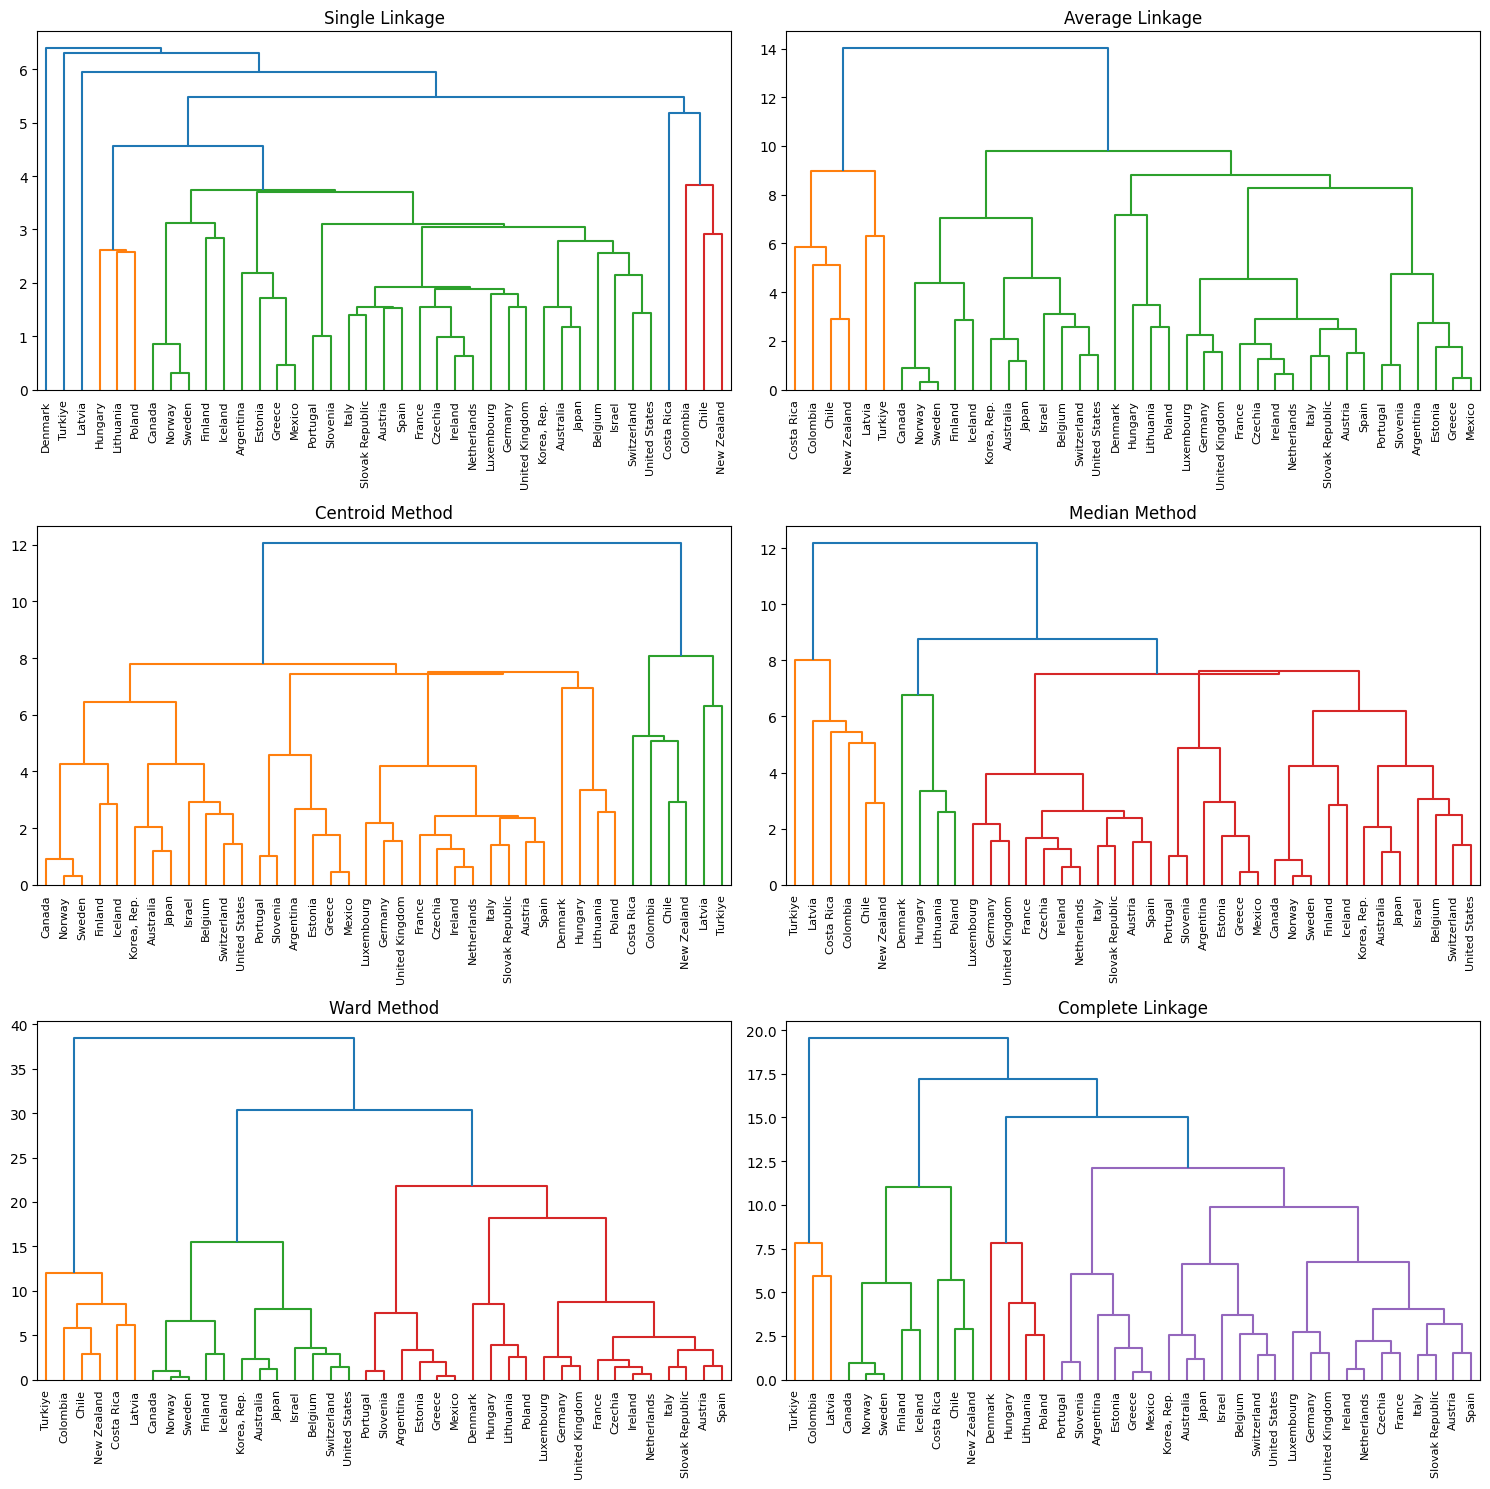

In [203]:
# Encadanamientos por Linkage
from scipy.cluster.hierarchy import linkage, dendrogram
h_single   = linkage(matriz_distancia, method="single")
h_complete = linkage(matriz_distancia, method="complete")
h_average  = linkage(matriz_distancia, method="average")
h_centroid = linkage(matriz_distancia, method="centroid")
h_median   = linkage(matriz_distancia, method="median")
h_ward     = linkage(matriz_distancia, method="ward")

etiquetas = df['Country Name'].to_list()

plt.rcParams['xtick.labelsize'] = 8

#Cambiar nombres
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].set_title("Single Linkage")
dendrogram(h_single, labels=etiquetas, ax=axs[0, 0], leaf_rotation=90, leaf_font_size=8)

axs[0, 1].set_title("Average Linkage")
dendrogram(h_average, labels=etiquetas, ax=axs[0, 1], leaf_rotation=90, leaf_font_size=8)

axs[1, 0].set_title("Centroid Method")
dendrogram(h_centroid, labels=etiquetas, ax=axs[1, 0], leaf_rotation=90, leaf_font_size=8)

axs[1, 1].set_title("Median Method")
dendrogram(h_median, labels=etiquetas, ax=axs[1, 1], leaf_rotation=90, leaf_font_size=8)

axs[2, 0].set_title("Ward Method")
dendrogram(h_ward, labels=etiquetas, ax=axs[2, 0], leaf_rotation=90, leaf_font_size=8)

axs[2, 1].set_title("Complete Linkage")
dendrogram(h_complete, labels=etiquetas, ax=axs[2, 1], leaf_rotation=90, leaf_font_size=8)

plt.tight_layout()
plt.show()

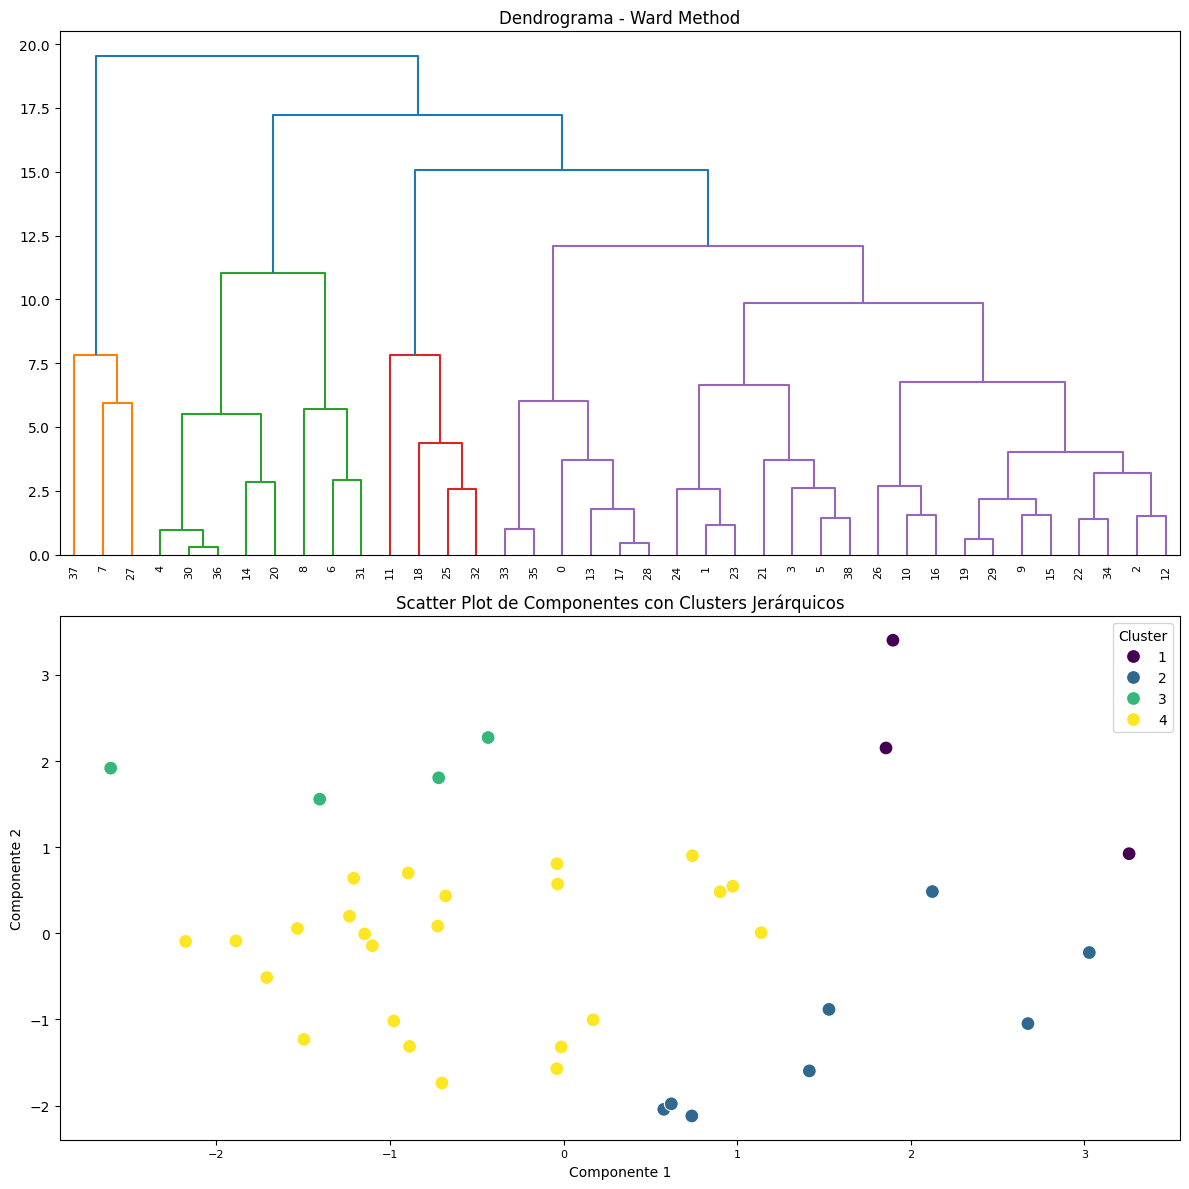

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import pairwise_distances

# Paso 1: Calcular la matriz de distancias y aplicar el método de Ward
matriz_distancia = pairwise_distances(componentes.iloc[:,1:], metric='euclidean')
matriz_distancia = pairwise_distances(componentes.iloc[:, 1:], metric='euclidean')
h_ward = linkage(matriz_distancia, method="complete")

# # Paso 2: Obtener las etiquetas de los clusters
num_clusters = 4  # Define el número de clusters que deseas
clusters = fcluster(h_ward, num_clusters, criterion='maxclust')

# Paso 3: Graficar el dendrograma y el scatter plot
fig, axs = plt.subplots(2, 1, figsize=(12, 12))  # Uno arriba del otro (2 filas, 1 columna)

# Dendrograma (en la parte superior)
axs[0].set_title("Dendrograma - Ward Method")
dendrogram(h_ward, labels=componentes.index, ax=axs[0], leaf_rotation=90, leaf_font_size=8)

# Scatter plot de los componentes (en la parte inferior)
axs[1].set_title("Scatter Plot de Componentes con Clusters Jerárquicos")

# Crear el scatterplot coloreado según los clusters
sns.scatterplot(x=componentes.iloc[:, 1], y=componentes.iloc[:, 2], hue=clusters, palette='viridis', s=100, ax=axs[1])

# Ajustar etiquetas y leyenda
axs[1].set_xlabel('Componente 1')
axs[1].set_ylabel('Componente 2')
axs[1].legend(title='Cluster')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


##### **3.2. INTERPRETACIÓN DE CLUSTERS**

#### **4. ANÁLISIS DE FACTORES**

In [201]:
def mardia_test(X: np.ndarray, cov: bool = True):
    """
    Prueba de simetría y curtosis multivariada de Mardia.
    Calcula los coeficientes de simetría y curtosis multivariada de Mardia,
    así como sus correspondientes pruebas estadísticas.

    Parámetros:
         X - matriz de datos multivariados;
         cov - booleano para indicar si se normaliza la matriz de covarianza por n (c=1[por defecto]) o por n-1 (c~=1).

    Retorna:
         - coeficiente de simetría;
         - coeficiente de curtoris;
         - estadístico de prueba de simetría;
         - estadístico de prueba de curtosis;
         - valor de significancia para simetría;
         - valor de significancia para curtosis.
    """
    n, p = X.shape

    if cov:
        S = ((n - 1)/n) * np.cov(X.T)
    else:
        S = np.cov(X.T)

    X_mean = X.mean(axis=0)
    
    #Inversa - verificar si la matriz es singular.
    try:
        iS = np.linalg.inv(S)
    except Exception as e:
        print(e)
        return 0.0, 0.0, 0.0, 0.0
    
    #Matriz de distancias de Mahalanobis al cuadrado.
    D: np.ndarray = (X - X_mean) @ iS @ (X - X_mean).T
    
    #Coeficiente de simetría multivariada.
    msc: float = np.sum(D**3)/n**2
    #Coeficiente de curtosis multivariada.
    mkc: float = np.trace(D**2)/n

    #Grados de libertad.
    df: float = (p * (p + 1) * (p + 2))/6

    #Estadístico de simetría: se aproxima a una distribución Chi-cuadrado
    g_skew = ((p + 1)*(n + 1)*(n + 3))/(6*(((n + 1)*(p + 1)) - 6)) * msc 
    #Valor de significancia asociado a la simetría.
    p_skew: float = 1.0 - stats.chi2.cdf(g_skew, df)

    #Estadístico de curtosis: se aproxima a una distribución normal estándar.
    g_kurt = (mkc - (p*(p + 2)))/(np.sqrt((8 * p * (p + 2))/n))
    #Valor de significancia asociado a la curtosis.
    p_kurt: float = 2 * (1.0 - stats.norm.cdf(np.abs(g_kurt)))

    X = {
        "Término": ["Coeficiente de Simetría", "Coeficiente de Curtosis"],
        "Coeficiente": [msc, mkc],
        "Estadístico": [g_skew, g_kurt],
        "P-valor": [p_skew, p_kurt]
    }
    df = pd.XFrame(X)

    #Mostrar tabla formateada usando tabulate.
    print(tabulate(df, headers='keys', tablefmt="pipe", showindex=False, floatfmt=".4f"))

In [202]:
import numpy as np
import pandas as pd
from sklearn.utils.extmath import randomized_svd
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

class FA():
    """
    Clase para análisis exploratorio de los Factores de una matriz de datos mediante método de Factores Principales.

    Esta clase:
        (1) Entrena un modelo de análisis factorial mediante el Método de Factores Principales ("Principal Factor Method"), según se define en Rencher (2002, chap. 13);
        (2) Devuelve: eigenvalues, eigenvectors, loading matrix, communalities, uniquenesses, correlation matrix;
        (3) Permite al generación de una rotación de las cargas ("orthogonal varimax rotation").

    Parámetros
    ----------
    X : np.ndarray
        Matriz de datos.
    n_factors : int, opcional
        Número de factores a extraer.
        Default es None.
    svd_method : {'randomized', 'np.svd'}
        Método para la realización de la descomposicón en valores singulares ("Singular Value Decomposition").
        Default es 'randomized', de librería scikit-learn. Para cualquier otra opción, SVD será realizada desde numpy.

    Atributos
    ---------
    get_eig: :obj:`numpy.ndarray`
        Matrices de autovalores y autovectores.
    get_loadings: :obj:`numpy.ndarray`
        Matriz de cargas.
    get_communalities_uniquenesses: :obj:`numpy.ndarray`
        Mtrices de comunalidades y unicidades.
    get_fa: :obj: personalizado
        Salida similiar a STATA.
    get_comparative_corr_matrix: :obj: personalizado
        Comparación para la matriz de correlaciones (estimada vs. original).
    get_rotated_loadings: :obj:`numpy.ndarray`
        Cargas rotadas. Permite ajuste Kaiser (None por Default).

    """
    def __init__(self, X, n_factors=None, svd_method="randomized"):
        self.X = X
        self.n_factors = n_factors
        self.svd_method = svd_method

    def get_eig(self):
        """ 
        Regresa los autovalores y autovectores de la matriz de correlación corregida según Método de Factores Principales,
        de acuerdo al método de SVD seleccionado. 
        """ 

        self.X_corr = np.corrcoef(self.X, rowvar=False)
        self.X_corr_inv = np.linalg.inv(self.X_corr)
        self.X_corr_inv_diag = np.diag(self.X_corr_inv)
        self.R = 1 - (1 / self.X_corr_inv_diag)
        self.X_corr_o = self.X_corr.copy()
        np.fill_diagonal(self.X_corr, self.R)
        self.eigenvalues, _ = np.linalg.eig(self.X_corr) #Para conocer los autovalores negativos
        if self.svd_method == "randomized_svd":
            self.eigenvectors, self.eigenvalues_p, _ = randomized_svd(self.X_corr, n_components=self.X_corr.shape[1], random_state=1234567890)
        else:
            self.eigenvectors, self.eigenvalues_p, _ = np.linalg.svd(self.X_corr, full_matrices=False)

        return self.eigenvalues, self.eigenvectors

    def get_loadings(self):
        """ 
        Regresa las cargas de los Factores, conservando solo aquellas cargas cuyos autovalores sean positivos.
        """  

        self.get_eig()

        self.loadings = self.eigenvectors * np.sqrt(self.eigenvalues_p)
        positive_filter = np.array([i for i, value in enumerate(np.round(self.eigenvalues_p, decimals=10)) if value in np.round(self.eigenvalues, decimals=10)])
        self.positive_loadings = self.loadings[:, positive_filter]

        if self.n_factors == None:
            self.positive_loadings
        else:
            self.positive_loadings = self.positive_loadings[:, :self.n_factors]

        return self.positive_loadings
    
    def get_communalities_uniquenesses(self):
        """ 
        Regresa las comunalidades y unicidades de los Factores.
        """ 

        self.get_loadings()
        self.communalities, self.uniquenesses = np.sum((self.positive_loadings**2), axis=1), 1 - np.sum((self.positive_loadings**2), axis=1)

        return self.communalities, self.uniquenesses
        
    
    def get_fa(self):
        """
        Regresa un resumen detallado de análisis factorial, replicando salida de STATA.
        """      

        self.get_communalities_uniquenesses()                 
        loadings_matrix = pd.DataFrame(self.positive_loadings, columns=[f"Factor {i+1}" for i in range(self.positive_loadings.shape[1])], index=[f"x{i+1}" for i in range(self.positive_loadings.shape[0])]).reset_index(names='Variable')
        loadings_matrix = pd.concat([loadings_matrix, pd.DataFrame(self.uniquenesses, columns=['Uniqueness']), pd.DataFrame(self.communalities, columns=['Communality'])], axis=1)
        eigenv_matrix = pd.DataFrame(np.sort(self.eigenvalues)[::-1], columns=['Eigenvalue'], index=[f"Factor {i+1}" for i in range(self.eigenvalues.shape[0])]).reset_index(names='Factor')
        eigenv_proportion = [np.sort(self.eigenvalues)[::-1][i] / np.sum(np.sort(self.eigenvalues)[::-1]) for i in range(len(self.eigenvalues))]
        eigenv_proportion_cs = np.cumsum(eigenv_proportion)
        eigenv_matrix = pd.concat([eigenv_matrix, pd.DataFrame(eigenv_proportion, columns=['Proportion']), pd.DataFrame(eigenv_proportion_cs, columns=['Cumulative'])], axis=1)

        eigenv_table = tabulate(eigenv_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")
        loadings_table = tabulate(loadings_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")

        eigenv_lines = eigenv_table.splitlines()
        loadings_lines = loadings_table.splitlines()

        max_lines = max(len(eigenv_lines), len(loadings_lines))
        eigenv_lines += [''] * (max_lines - len(eigenv_lines))
        loadings_lines += [''] * (max_lines - len(loadings_lines))

        combined_output = "\n".join(f"{eigenv: <40}   {loading}" for eigenv, loading in zip(eigenv_lines, loadings_lines))
        
        print("Resultados de Factor Analysis")
        print(combined_output)
    
    def get_comparative_corr_matrix(self):
        """
        Regresa una comparación de la matriz de correlaciones (estimada por el modelo factorial vs. original).
        """
        self.get_communalities_uniquenesses()
        estimated_corr = self.positive_loadings @ self.positive_loadings.T + np.diag(self.uniquenesses)
        estimated_corr_matrix = pd.DataFrame(estimated_corr, columns=[f"x{i+1}" for i in range(estimated_corr.shape[1])], index=[f"x{i+1}" for i in range(estimated_corr.shape[0])]).reset_index(names='Variables')
        corr = self.X_corr_o
        corr_matrix = pd.DataFrame(corr, columns=[f"x{i+1}" for i in range(corr.shape[1])], index=[f"x{i+1}" for i in range(corr.shape[0])]).reset_index(names='Variables')

        est_corr_table = tabulate(estimated_corr_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")
        corr_table = tabulate(corr_matrix, headers='keys', tablefmt="fancy_grid", showindex=False, floatfmt=".4f")

        est_corr_lines = est_corr_table.splitlines()
        corr_lines = corr_table.splitlines()

        max_lines = max(len(est_corr_lines), len(corr_lines))
        est_corr_lines += [''] * (max_lines - len(est_corr_lines))
        corr_lines += [''] * (max_lines - len(corr_lines))

        combined_output = "\n".join(f"{eigenv: <40}   {loading}" for eigenv, loading in zip(est_corr_lines, corr_lines))
     

        print("Matriz de correlación estimada (izquierda) vs. Matriz de correlación (derecha)")
        print(combined_output)
        

    def get_rotated_loadings(self, kaiser=False):
        """
        Regresa la cargas rotadas del modelo factorial (orthogonal varimax rotation").
        Permite aplicar adecuación Kaiser.
        """
        self.get_communalities_uniquenesses()
        X = self.positive_loadings.copy()
        n_rows, n_cols = X.shape
        if n_cols < 2:
            return X

        # normalize the loadings matrix
        # using sqrt of the sum of squares (Kaiser)
        if kaiser:
            normalized_mtx = np.apply_along_axis(
                lambda x: np.sqrt(np.sum(x**2)), 1, X.copy()
            )
            X = (X.T / normalized_mtx).T

        # initialize the rotation matrix
        # to N x N identity matrix
        rotation_mtx = np.eye(n_cols)

        d = 0
        for _ in range(5000):
            old_d = d

            # take inner product of loading matrix
            # and rotation matrix
            basis = np.dot(X, rotation_mtx)

            # transform data for singular value decomposition using updated formula :
            # B <- t(x) %*% (z^3 - z %*% diag(drop(rep(1, p) %*% z^2))/p)
            diagonal = np.diag(np.squeeze(np.repeat(1, n_rows).dot(basis**2)))
            transformed = X.T.dot(basis**3 - basis.dot(diagonal) / n_rows)

            # perform SVD on
            # the transformed matrix
            U, S, V = np.linalg.svd(transformed)

            # take inner product of U and V, and sum of S
            rotation_mtx = np.dot(U, V)
            d = np.sum(S)

            # check convergence
            if d < old_d * (1 + 1e-5):
                break

        # take inner product of loading matrix
        # and rotation matrix
        X = np.dot(X, rotation_mtx)

        # de-normalize the data
        if kaiser:
            X = X.T * normalized_mtx
        else:
            X = X.T

        # convert loadings matrix to data frame
        rotated_loadings = X.T.copy()
        return rotated_loadings